# Sales Analysis

#### Project statement:

AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country. 

The brand caters to all age groups, from kids to the elderly. 

Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department. 

The specific tasks include:
1) Identify the states that are generating the highest revenues.
2) Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.
   
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the
company in making data-driven decisions for the upcoming year.

<br><br>

We are going to Perform the following steps:

1. Data wrangling
2. Data analysis
3. Data visualization
4. Report generation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#importing data
df=pd.read_csv('AusApparalSales4thQrt2020.csv')
df.columns = df.columns.str.strip() #for removing leading and trailing white spaces from column header.
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) #This line removes leading and trailing whitespace from the data in all columns that contain string data.
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [23]:
#check data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


## 1. Data Wrangling -

a. Ensure that the data is clean and free from any missing or incorrect entries.

   Inspect the data manually to identify missing or incorrect information using the functions isna() and notna()

In [27]:
#Check for missing values
df.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [29]:
#Count of missing values

df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [31]:
#Another way to identify missing values

df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [33]:
#Count for non missing values
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

#### We can see above isna().sum() is returning 0 for all columns that means data is not having any missing data 
#### Similarly We can see notna().sum() also returning the 7560 in all columns which also says there is no column available in our data which has missing values.

<br><br>

#### b. Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them)

#### We don't have missing values but lets put the below functions for showcase purpose.

In [38]:
#For Dropping the null values
df.dropna(axis=0, inplace=True) #this will delete all the rows where any of the column has null values.
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [40]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [46]:
#We have one more way that is we will put the average of the data in the missing values column.
# Replace missing values with the mean just example about Sales Column
mean = df['Sales'].mean()
df.fillna({'Sales': mean}, inplace=True)

<br><br>

#### d. Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

In [50]:
#Lets use group by and find some insights
#Sales by State
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()
print(sales_by_state)

  State      Sales
0   NSW   74970000
1    NT   22580000
2   QLD   33417500
3    SA   58857500
4   TAS   22760000
5   VIC  105565000
6    WA   22152500


In [52]:
#Average Sales accroding to Group
avg_sales_to_group = df.groupby('Group')['Sales'].mean().reset_index()
print(avg_sales_to_group)

     Group         Sales
0     Kids  45011.904762
1      Men  45370.370370
2  Seniors  44464.285714
3    Women  45207.671958


In [54]:
# Sales by Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
sales_by_month = df.groupby('Month')['Sales'].sum().reset_index()
print(sales_by_month)

     Month      Sales
0  2020-10  114290000
1  2020-11   90682500
2  2020-12  135330000


<br><br>

# 2. Data Analysis

#### a. Perform descriptive statistical analysis on the data in the Sales and Unit columns

In [59]:
df[['Unit', 'Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [61]:
mode = df[['Unit', 'Sales']].mode()
print(mode)

   Unit  Sales
0     9  22500


### b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [64]:
sales_by_group = df.groupby('Group')['Sales'].sum().reset_index()
#print(sales_by_group)
highest_sales_group = sales_by_group.loc[sales_by_group['Sales'].idxmax()]
lowest_sales_group = sales_by_group.loc[sales_by_group['Sales'].idxmin()]
print(f"Group with Highest Sales:\n{highest_sales_group}\n")
print(f"Group with Lowest Sales:\n{lowest_sales_group}\n")

Group with Highest Sales:
Group         Men
Sales    85750000
Name: 1, dtype: object

Group with Lowest Sales:
Group     Seniors
Sales    84037500
Name: 2, dtype: object



### c.We can also find out which state doing Highest and lowest sales.

In [67]:
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()
#print(sales_by_state)
highest_sales_state = sales_by_state.loc[sales_by_state['Sales'].idxmax()]
lowest_sales_state = sales_by_state.loc[sales_by_state['Sales'].idxmin()]
print(f"State with Highest Sales:\n{highest_sales_state}\n")
print(f"State with Lowest Sales:\n{lowest_sales_state}\n")

State with Highest Sales:
State          VIC
Sales    105565000
Name: 5, dtype: object

State with Lowest Sales:
State          WA
Sales    22152500
Name: 6, dtype: object



### Let make it little more advance now we want to know which group doing highest and lowest sale in each state.

In [70]:
sales_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
#print(sales_by_state_group)
highest_sales = sales_by_state_group.loc[sales_by_state_group.groupby('State')['Sales'].idxmax()]
lowest_sales = sales_by_state_group.loc[sales_by_state_group.groupby('State')['Sales'].idxmin()]
print(f"Highest Sales Group Each State:\n{highest_sales}\n")
print(f"Lowest Sales Group Each State:\n{lowest_sales}\n")

Highest Sales Group Each State:
   State  Group     Sales
3    NSW  Women  19172500
5     NT    Men   5762500
8    QLD   Kids   8510000
15    SA  Women  14970000
16   TAS   Kids   5775000
23   VIC  Women  26482500
25    WA    Men   5752500

Lowest Sales Group Each State:
   State    Group     Sales
2    NSW  Seniors  18187500
6     NT  Seniors   5465000
10   QLD  Seniors   8190000
12    SA     Kids  14515000
19   TAS    Women   5577500
22   VIC  Seniors  26315000
27    WA    Women   5262500



### d.Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted

In [73]:
df.set_index('Date', inplace=True) # Set date column as index

In [217]:
daily_report = df.resample('D').agg({'Sales': 'sum', 'Unit': 'sum'})
print("\nDaily Report:")
print(daily_report)


Daily Report:
              Sales  Unit
Date                     
2020-10-01  3720000  1488
2020-10-02  3715000  1486
2020-10-03  3890000  1556
2020-10-04  3720000  1488
2020-10-05  3862500  1545
...             ...   ...
2020-12-26  4715000  1886
2020-12-27  4637500  1855
2020-12-28  4595000  1838
2020-12-29  4607500  1843
2020-12-30  4590000  1836

[91 rows x 2 columns]



Weekly Report:
               Sales   Unit
Date                       
2020-10-04  15045000   6018
2020-10-11  27002500  10801
2020-10-18  26640000  10656
2020-10-25  26815000  10726
2020-11-01  21807500   8723
2020-11-08  20865000   8346
2020-11-15  21172500   8469
2020-11-22  21112500   8445
2020-11-29  21477500   8591
2020-12-06  29622500  11849
2020-12-13  31525000  12610
2020-12-20  31655000  12662
2020-12-27  31770000  12708
2021-01-03  13792500   5517


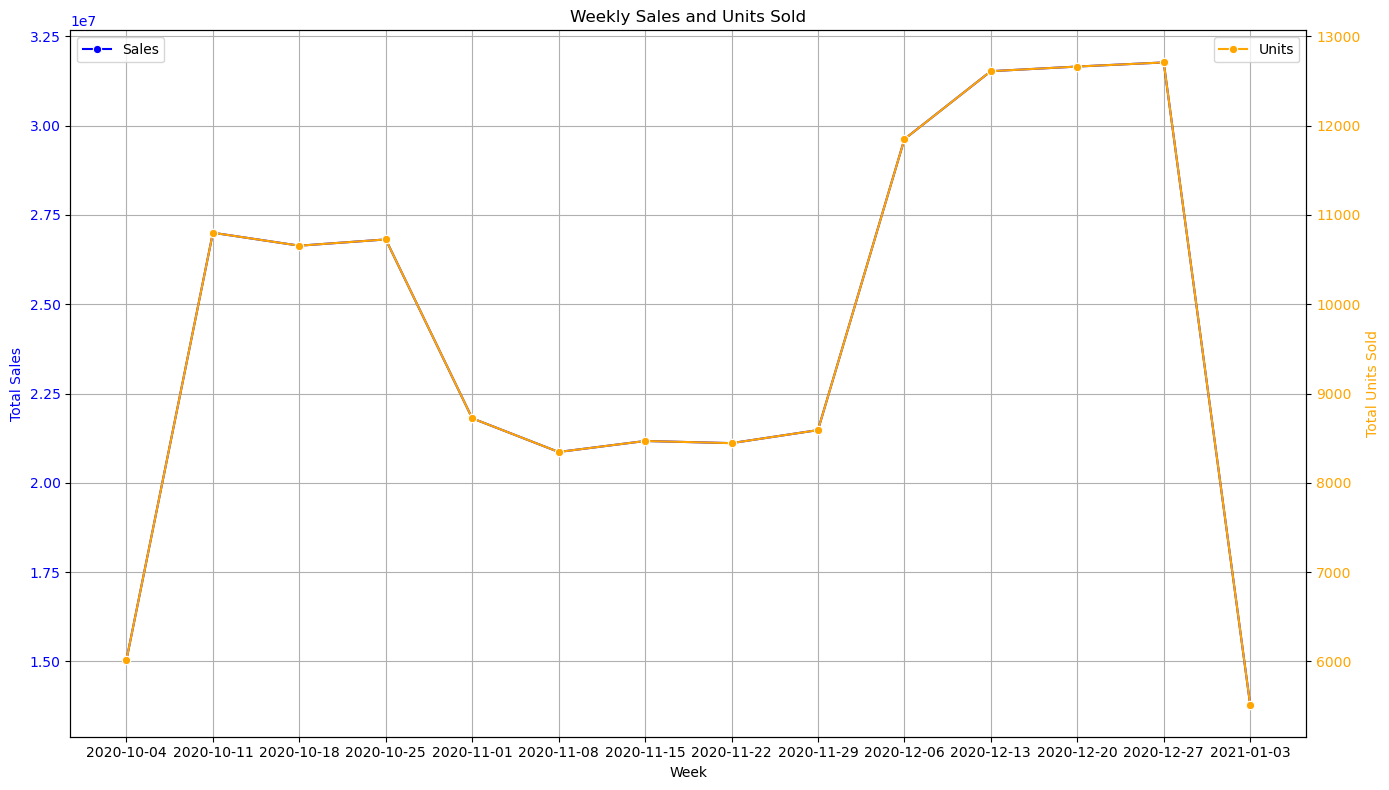

In [223]:
weekly_report = df.resample('W').agg({'Sales': 'sum', 'Unit': 'sum'})
print("\nWeekly Report:")
print(weekly_report)

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.lineplot(data=weekly_report, x=weekly_report.index.strftime('%Y-%m-%d'), y='Sales', ax=ax1, marker='o', color='blue', label='Sales')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=weekly_report, x=weekly_report.index.strftime('%Y-%m-%d'), y='Unit', ax=ax2, marker='o', color='orange', label='Units')
ax2.set_ylabel('Total Units Sold', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Weekly Sales and Units Sold')
ax1.set_xlabel('Week')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Monthly Report:
                Sales   Unit
Date                        
2020-10-31  114290000  45716
2020-11-30   90682500  36273
2020-12-31  135330000  54132


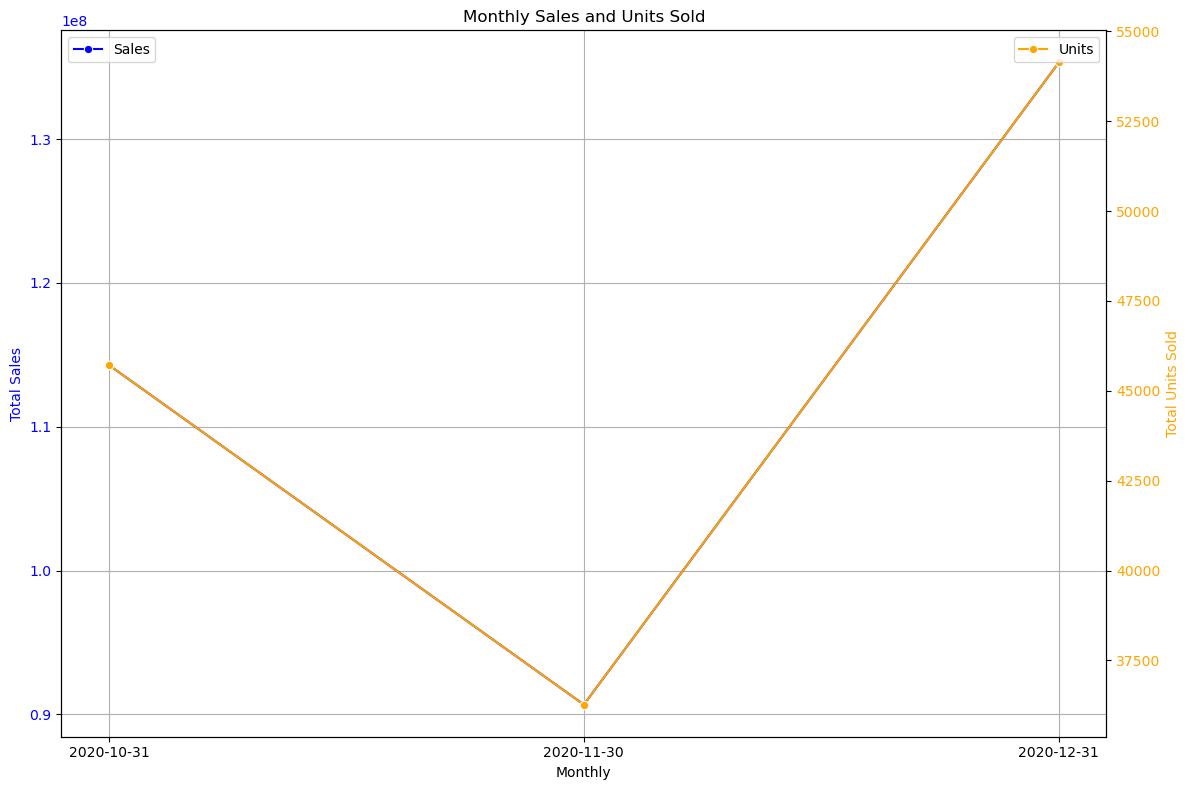

In [196]:
monthly_report = df.resample('ME').agg({'Sales': 'sum', 'Unit': 'sum'})
print("\nMonthly Report:")
print(monthly_report)

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.lineplot(data=monthly_report, x=monthly_report.index.strftime('%Y-%m-%d'), y='Sales', ax=ax1, marker='o', color='blue', label='Sales')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=monthly_report, x=monthly_report.index.strftime('%Y-%m-%d'), y='Unit', ax=ax2, marker='o', color='orange', label='Units')
ax2.set_ylabel('Total Units Sold', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Monthly Sales and Units Sold')
ax1.set_xlabel('Monthly')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Quarterly Report:
                Sales    Unit
Date                         
2020-12-31  340302500  136121


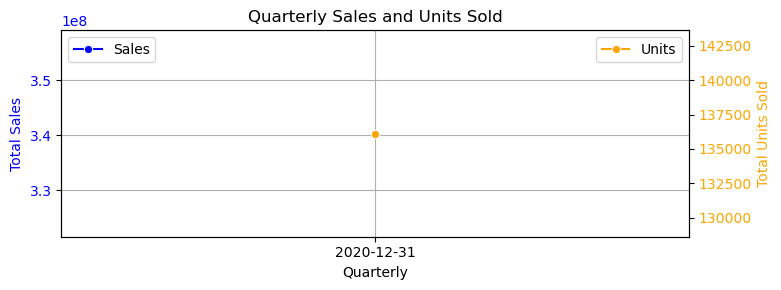

In [186]:
quarterly_report = df.resample('QE').agg({'Sales': 'sum', 'Unit': 'sum'})
print("\nQuarterly Report:")
print(quarterly_report)

fig, ax1 = plt.subplots(figsize=(8, 3))

sns.lineplot(data=quarterly_report, x=quarterly_report.index.strftime('%Y-%m-%d'), y='Sales', ax=ax1, marker='o', color='blue', label='Sales')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=quarterly_report, x=quarterly_report.index.strftime('%Y-%m-%d'), y='Unit', ax=ax2, marker='o', color='orange', label='Units')
ax2.set_ylabel('Total Units Sold', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Quarterly Sales and Units Sold')
ax1.set_xlabel('Quarterly')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

<br><br>

# 3. Data visualization

### a. State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

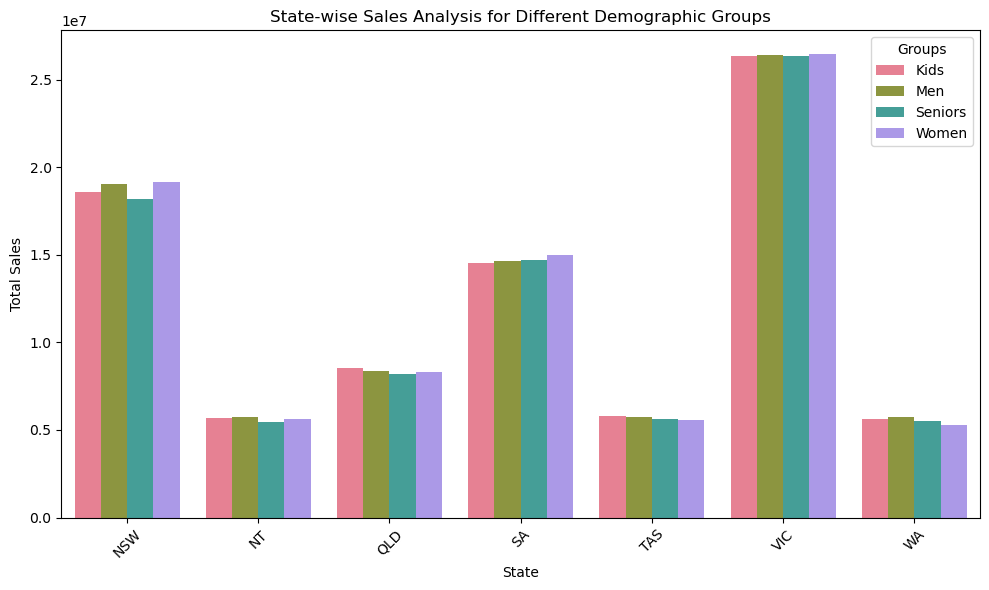

In [84]:
#We will use sales_by_state_group which we done while doing which group doing highest and lowest sale in each state.
# Create a pivot table for better visualization
pivot_table = sales_by_state_group.pivot(index='State', columns='Group', values='Sales') 

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_state_group, x='State', y='Sales', hue='Group', palette='husl')
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Groups')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### As per above graph, we have found out that state VIC is doing maximum sales and generating maximum revenue for AAA. this is first outcome for which we are doing analysis.

#### b. Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

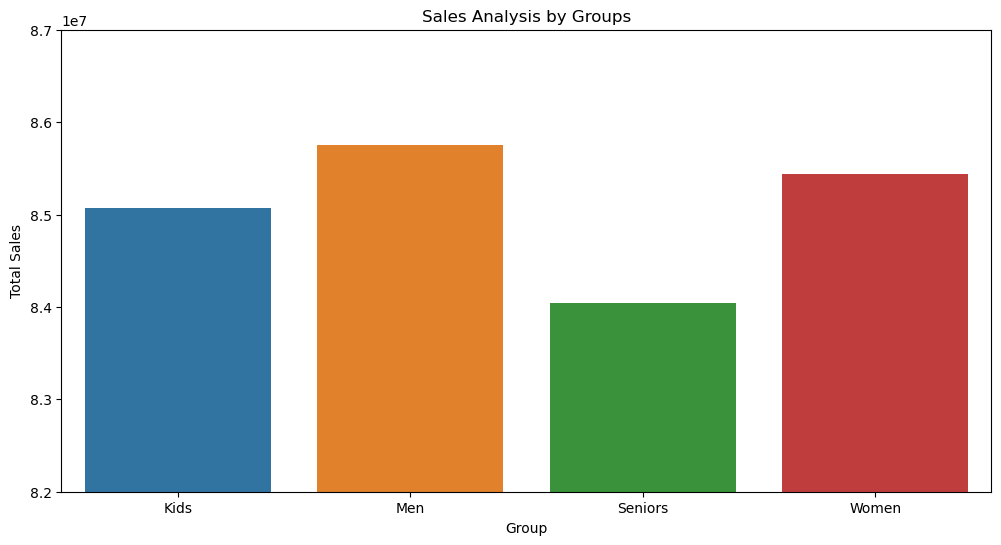

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_group, x='Group', y='Sales', hue='Group')

# Customize the plot
plt.title('Sales Analysis by Groups')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.ylim(82000000, 87000000)
plt.show()

#### Sales Analysis for all groups in all states group wise.

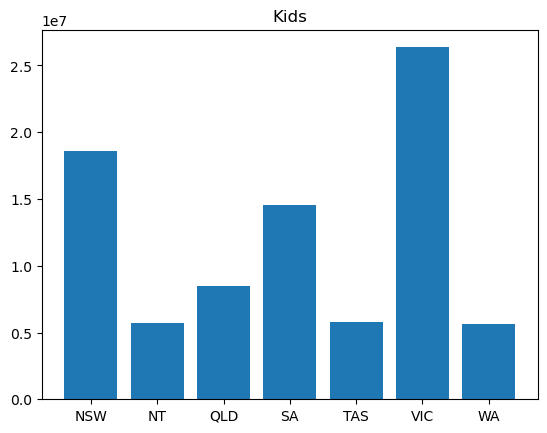

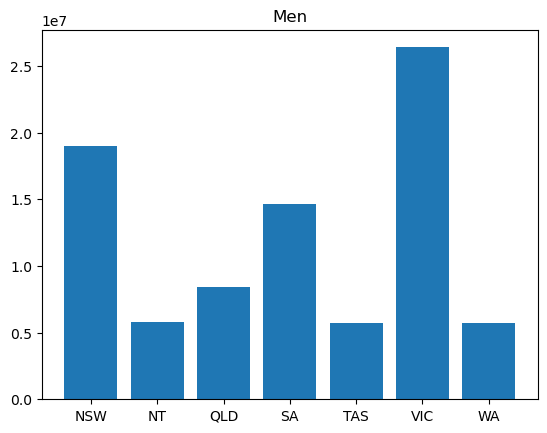

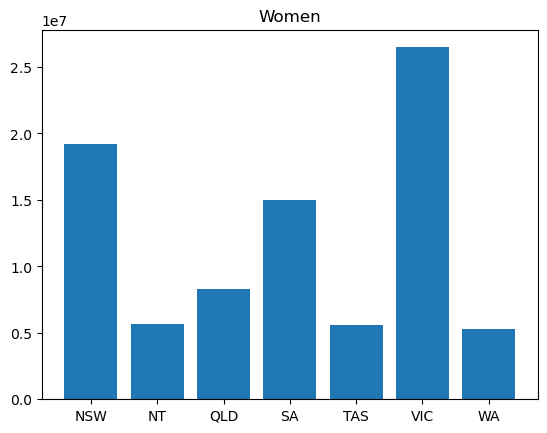

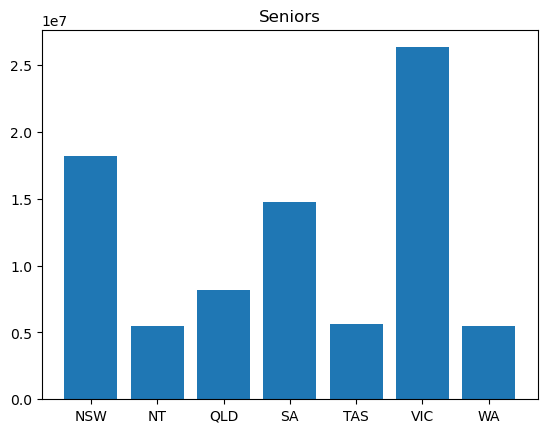

In [86]:
for i in df['Group'].unique():
    sub_group = df[df['Group'] == i].groupby( by = 'State', as_index = False).agg({'Sales':'sum'})

    plt.bar(sub_group['State'], sub_group['Sales'])
    plt.title(i)
    plt.show()

#### Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales

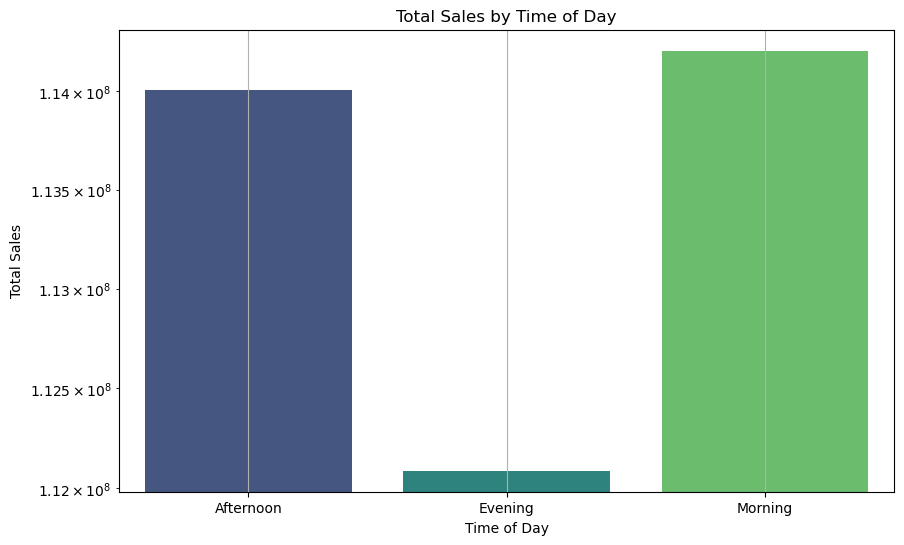

In [87]:
sales_by_time = df.groupby('Time')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))

sns.barplot(x='Time', y='Sales', data=sales_by_time, palette='viridis', hue = 'Time')
plt.yscale('log')

plt.title('Total Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.grid(True)

plt.show()

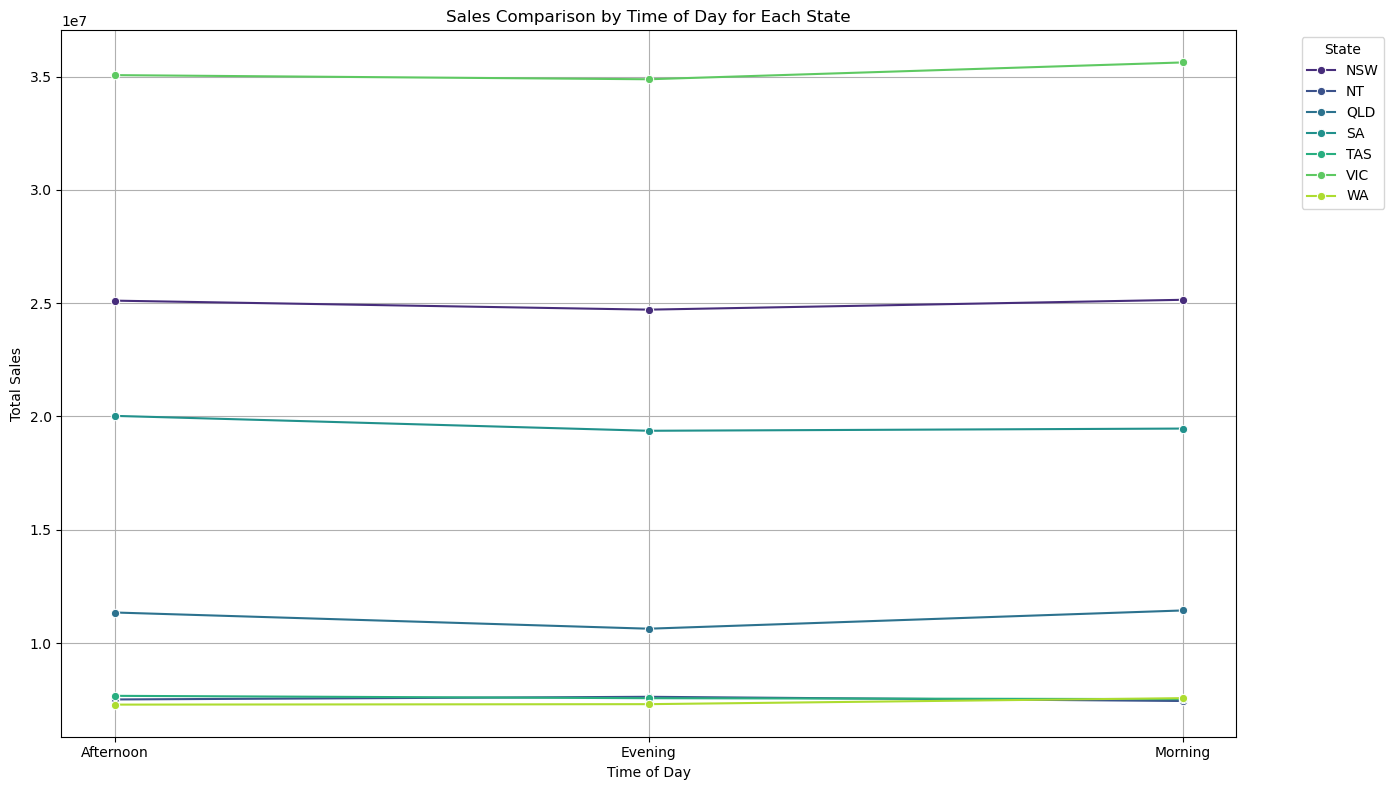

In [117]:
sales_by_state_time = df.groupby(['State','Time'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(data=sales_by_state_time, x='Time', y='Sales', hue='State', marker='o', palette='viridis')
plt.title('Sales Comparison by Time of Day for Each State')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

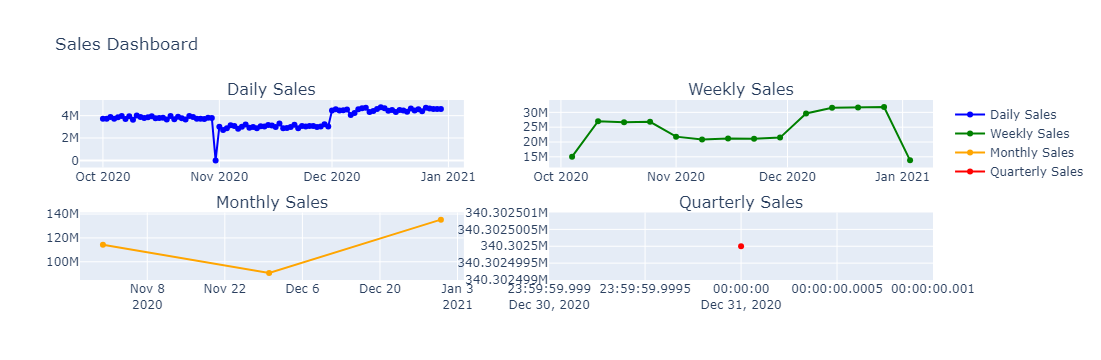

In [241]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Create a subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=('Daily Sales', 'Weekly Sales', 'Monthly Sales', 'Quarterly Sales'))

# Add daily sales plot
fig.add_trace(go.Scatter(
    x=daily_report.index,
    y=daily_report['Sales'],
    mode='lines+markers',
    marker=dict(color='blue'),
    text=daily_report.index.strftime('%Y-%m-%d'),  # Dates for hover text
    hoverinfo='text',  # Show only hover text
    name='Daily Sales'
), row=1, col=1)

# Add weekly sales plot
fig.add_trace(go.Scatter(
    x=weekly_report.index,
    y=weekly_report['Sales'],
    mode='lines+markers',
    marker=dict(color='green'),
    text=weekly_report.index.strftime('%Y-%m-%d'),
    hoverinfo='text',
    name='Weekly Sales'
), row=1, col=2)

# Add monthly sales plot
fig.add_trace(go.Scatter(
    x=monthly_report.index,
    y=monthly_report['Sales'],
    mode='lines+markers',
    marker=dict(color='orange'),
    text=monthly_report.index.strftime('%Y-%m-%d'),
    hoverinfo='text',
    name='Monthly Sales'
), row=2, col=1)

# Add quarterly sales plot
fig.add_trace(go.Scatter(
    x=quarterly_report.index,
    y=quarterly_report['Sales'],
    mode='lines+markers',
    marker=dict(color='red'),
    text=quarterly_report.index.strftime('%Y-%m-%d'),
    hoverinfo='text',
    name='Quarterly Sales'
), row=2, col=2)

# Update layout
fig.update_layout(title='Sales Dashboard', showlegend=True)

# Show the plot
fig.show()


<br><br>

### Now lets come to conclusion of our analysis:-

### Q1. Identify the states that are generating the highest revenue.

Ans - As per State-wise sales analysis for different demographic groups (kids, women, men, and seniors) graph, we have found out that state VIC is doing maximum sales for AAA.

### Q2. Develop sales programs for states with lower revenues.

Ans:- So, As per analysis TAS, NT, WA, and QLD are among the states with lower sales compared to others. To address this, we would like to recommend implementing marketing campaigns through social media and local events, as well as offering discounts and promotions. Additionally, we could consider organizing sales training programs for employees to improve customer engagement, in case customers aren’t converting once they visit the showroom.

Note:- We have also seen that all of the states has lower sales in the evening, we need to organize some events and provide some offers in the evening so, AAA can attract cusotmer in the evening hours as well